In [1]:
cat("\nThis is a notebook!")


This is a notebook!

In [12]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [13]:



cleveland_data<- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                         col_name = FALSE)
colnames(cleveland_data)<- c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num")
cleveland_data<- mutate(cleveland_data, region="Cleveland")
cleveland_data$num<-ifelse(cleveland_data$num==0,"true","false")


cleveland_data               






hungarian_data<-read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data",
                          col_name = FALSE)
colnames(hungarian_data)<- c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num")
hungarian_data<- mutate(hungarian_data, region="Hungarian")
hungarian_data$num<-ifelse(hungarian_data$num==0,"true","false")


switzerland_data<-read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data",
                            col_name = FALSE)
colnames(switzerland_data)<-c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num")
switzerland_data<- mutate(switzerland_data, region="Switzerland")
switzerland_data$num<-ifelse(switzerland_data$num==0,"true","false")



va_data<-read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",
                   col_name = FALSE)
colnames(va_data)<-c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num")
va_data<- mutate(va_data, region="VA_Long_Beach")
va_data$num<-ifelse(va_data$num==0,"true","false")


heart_disease_data<-rbind(cleveland_data,hungarian_data,switzerland_data,va_data)
heart_disease_data



Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,true,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,false,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,false,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,false,Cleveland
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,false,Cleveland
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,true,Cleveland


Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X6, X7, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X5, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X7, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or se

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,true,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,false,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,false,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,?,?,6,false,VA_Long_Beach
58,1,4,?,385,1,2,?,?,?,?,?,?,true,VA_Long_Beach
62,1,2,120,254,0,2,93,1,0,?,?,?,false,VA_Long_Beach


In [15]:
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

heart_disease_train

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,false,Cleveland
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,false,Cleveland
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,false,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,3,134,254,1,0,151,1,0,?,?,3,true,VA_Long_Beach
51,0,4,114,258,1,2,96,0,1,1,?,?,true,VA_Long_Beach
58,1,4,?,385,1,2,?,?,?,?,?,?,true,VA_Long_Beach


In [16]:


tidy_heart_disease_data<- heart_disease_train|>
                          select(region,sex,cp,thalach,trestbps)|>
                          filter(cp!="?",sex!="?",thalach!="?",trestbps!="?")|>
                          mutate(region=as.factor(region),
                                 sex=as.numeric(sex),
                                 cp=as.numeric(cp),
                                 thalach=as.numeric(thalach),
                                 trestbps=as.numeric(trestbps))
tidy_heart_disease_data

data_miss_num<-tidy_heart_disease_data|>
map_df(is.na)|>
map_df(sum)
data_miss_num
data_obs_num<-tidy_heart_disease_data|>
summarize(n_cp=sum(!is.na(cp)),
          n_region=sum(!is.na(region)),
          n_sex=sum(!is.na(sex)),
          n_thalach=sum(!is.na(thalach)),
          n_trestbps=sum(!is.na(trestbps)))
data_obs_num

heart_rate_mean<-tidy_heart_disease_data|>
            summarize(mean.rate=mean(thalach, na.rm=TRUE))
heart_rate_mean

blood_pressure_mean<-tidy_heart_disease_data|>
            summarize(mean.pressure=mean(trestbps, na.rm=TRUE))
blood_pressure_mean



region,sex,cp,thalach,trestbps
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Cleveland,1,4,108,160
Cleveland,0,4,160,140
Cleveland,1,4,155,140
⋮,⋮,⋮,⋮,⋮
VA_Long_Beach,1,4,96,130
VA_Long_Beach,1,3,151,134
VA_Long_Beach,0,4,96,114


region,sex,cp,thalach,trestbps
<int>,<int>,<int>,<int>,<int>
0,0,0,0,0


n_cp,n_region,n_sex,n_thalach,n_trestbps
<int>,<int>,<int>,<int>,<int>
644,644,644,644,644


mean.rate
<dbl>
136.941


mean.pressure
<dbl>
132.5404


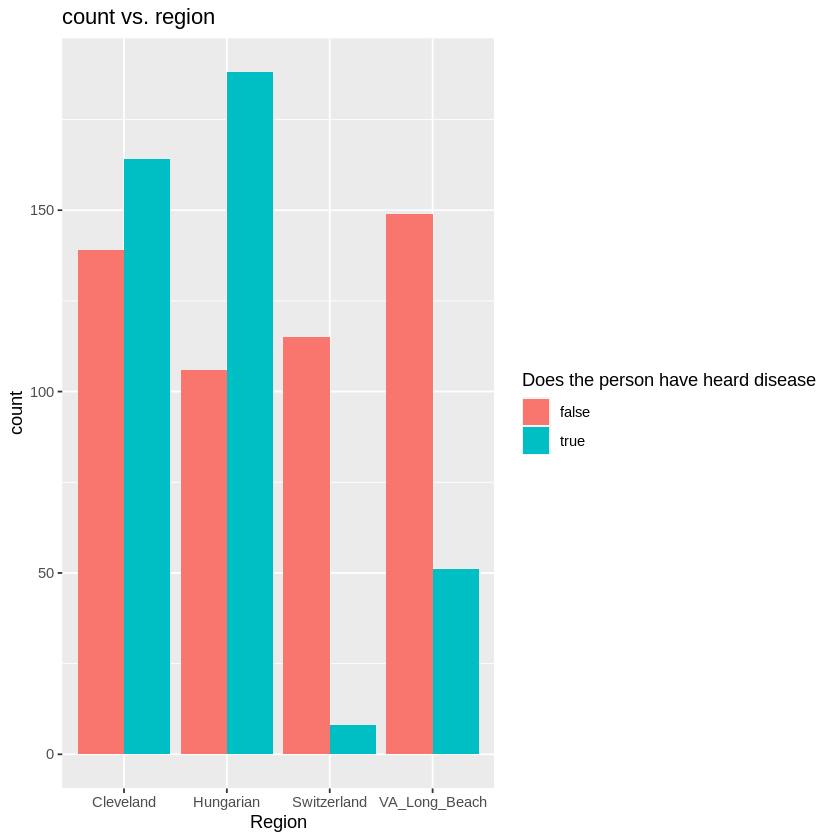

In [17]:
region_plot<-heart_disease_data|>
                 ggplot(aes(x = region, fill = num)) + 
    geom_bar(position = 'dodge') + 
    xlab("Region") +
    ylab("count") +
    labs(fill = "Does the person have heard disease") +
    ggtitle("count vs. region")


region_plot

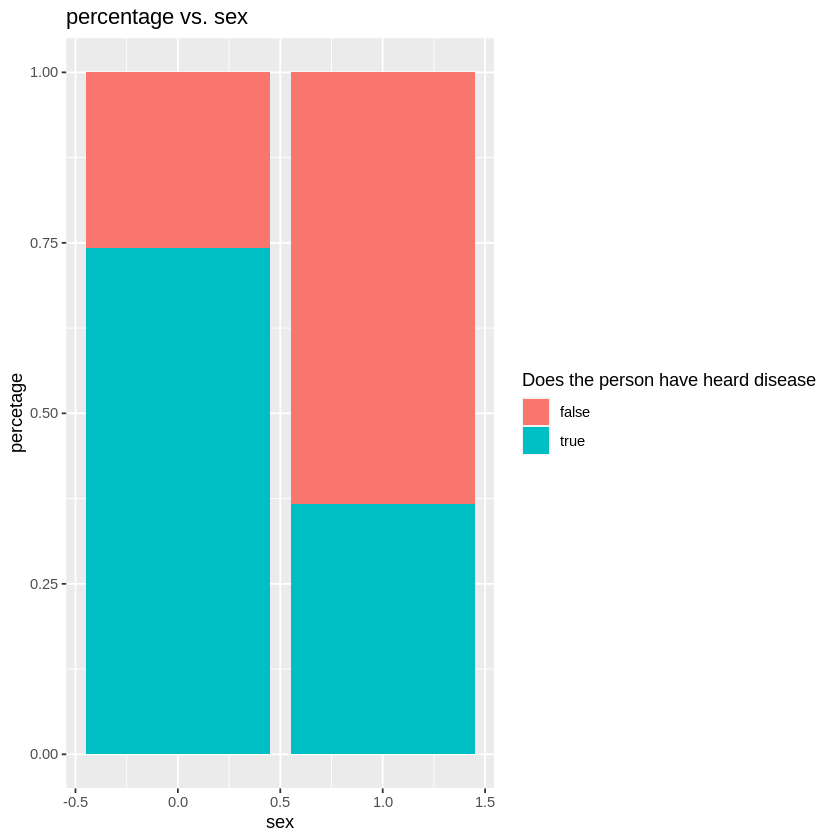

In [18]:

sex_plot<-heart_disease_data|>
                 ggplot(aes(x = sex, fill = num)) + 
    geom_bar(position = 'fill') + 
    xlab("sex") +
    ylab("percetage") +
    labs(fill = "Does the person have heard disease") +
    ggtitle("percentage vs. sex")


sex_plot

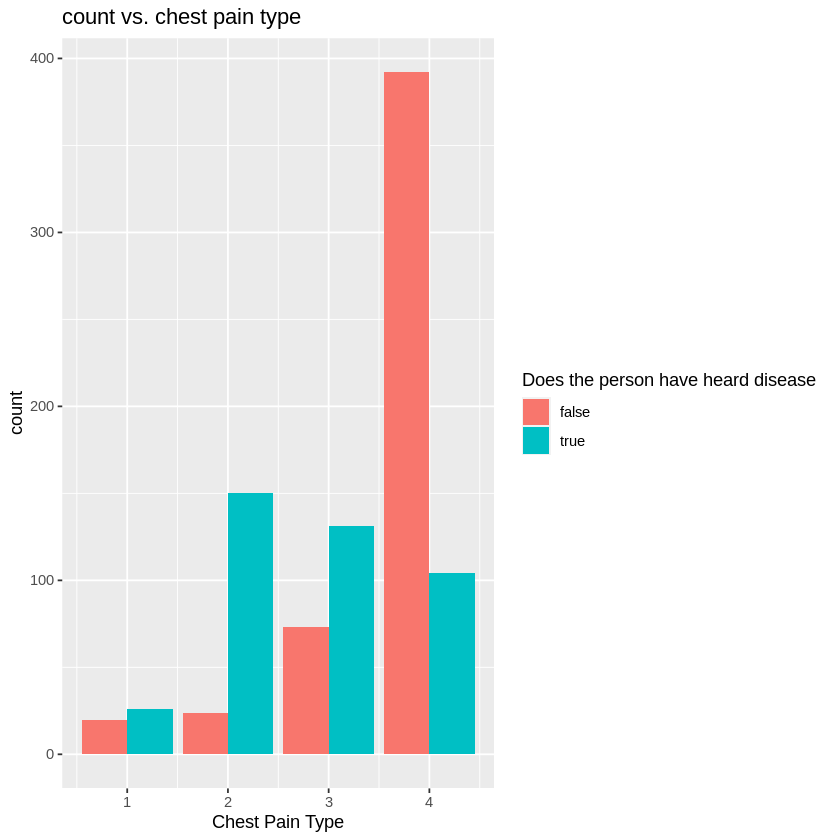

In [19]:

chest_pain_plot<-heart_disease_data|>
                 ggplot(aes(x = cp, fill = num)) + 
    geom_bar(position = 'dodge') + 
    xlab("Chest Pain Type") +
    ylab("count") +
    labs(fill = "Does the person have heard disease") +
    ggtitle("count vs. chest pain type")


chest_pain_plot

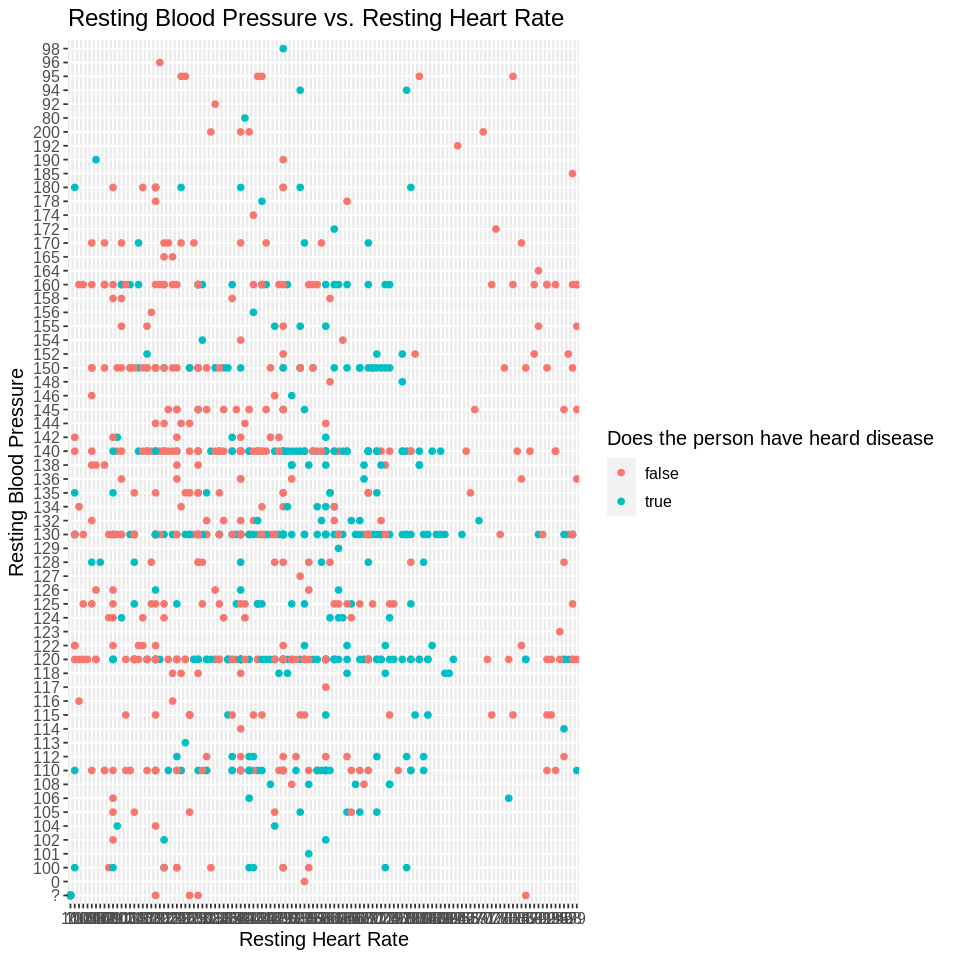

In [20]:
options(repr.plot.width = 8, repr.plot.height = 8)

rate_pressure_plot<-heart_disease_data|>
                 ggplot(aes(x = thalach,y=trestbps, color=num)) + 
    geom_point() + 
    xlab("Resting Heart Rate") +
    ylab("Resting Blood Pressure") +
    labs(color = "Does the person have heard disease") +
    theme(text = element_text(size = 12))+
    ggtitle("Resting Blood Pressure vs. Resting Heart Rate")


rate_pressure_plot